# Importing Necessary Libraries

In [5]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [6]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/zep-analytics/IPLScorePredictor/main/ipl_data.csv')

# Inspecting the dataset 

In [8]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [9]:
# Describing the ipl_dataset
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [10]:
df.shape

(76014, 15)

In [11]:
# Information about Each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [12]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [13]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
# Names of all columns
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

# Here, we can see that columns ['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'] won't provide any relevant information for our model to train

In [16]:
irrelevant = ['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df1 = df.drop(irrelevant, axis=1) # Drop Irrelevant Columns

In [17]:
df1.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [18]:
df1.shape

(76014, 8)

In [19]:
df.shape

(76014, 15)

In [20]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [21]:
df2 = df1[(df1['bat_team'].isin(const_teams)) & (df1['bowl_team'].isin(const_teams))]
df2

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...
75884,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [22]:
#Remove First 6 Overs of every match
df2 = df2[df2['overs'] >= 6.0]
df2.shape

(37389, 8)

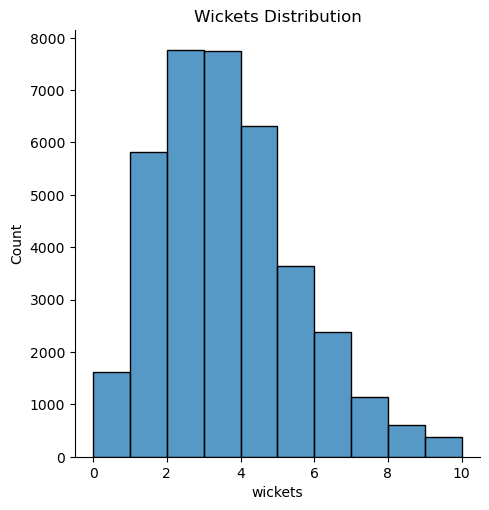

In [24]:
#Wickets Distribution
sns.displot(df2['wickets'],kde=False,bins=10)
plt.title("Wickets Distribution")

plt.show()

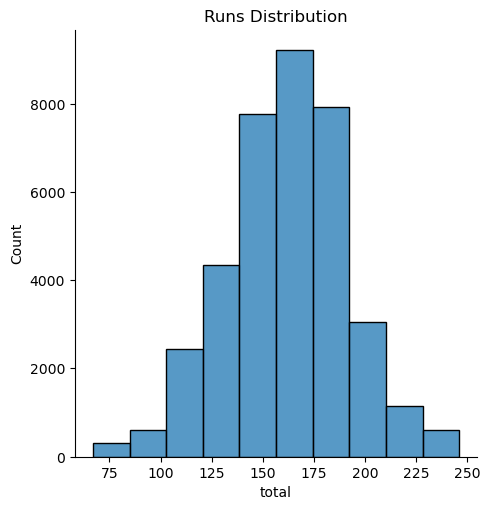

In [25]:
#Runs Distribution
sns.displot(df2['total'],kde=False,bins=10)
plt.title("Runs Distribution")

plt.show()

In [26]:
corr_mat=df2.corr()
corr_mat

,runs,wickets,overs,runs_last_5,wickets_last_5,total
runs,1.000000,0.308200,0.863692,0.605948,0.119662,0.422620
wickets,0.308200,1.000000,0.611976,-0.218141,0.637085,-0.476373
overs,0.863692,0.611976,1.000000,0.298497,0.235099,0.029121
runs_last_5,0.605948,-0.218141,0.298497,1.000000,-0.270695,0.594610
wickets_last_5,0.119662,0.637085,0.235099,-0.270695,1.000000,-0.286887
total,0.422620,-0.476373,0.029121,0.594610,-0.286887,1.000000


<Axes: >

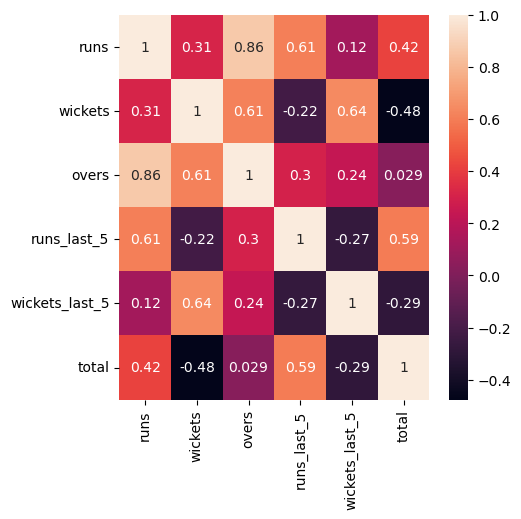

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_mat,annot=True)

In [28]:
#Performing Label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  df2[col] = le.fit_transform(df2[col])

In [29]:
df2.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,3,6,62,1,6.1,55,1,222
39,3,6,63,1,6.2,52,1,222
40,3,6,64,1,6.3,47,1,222
41,3,6,66,1,6.4,45,1,222
42,3,6,67,1,6.5,46,1,222


In [30]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0, 1])], 
                                      remainder='passthrough')

In [31]:
df2 = np.array(columnTransformer.fit_transform(df2))
df2

array([[  0.,   0.,   0., ...,  55.,   1., 222.],
       [  0.,   0.,   0., ...,  52.,   1., 222.],
       [  0.,   0.,   0., ...,  47.,   1., 222.],
       ...,
       [  0.,   0.,   0., ...,  28.,   4., 107.],
       [  0.,   0.,   0., ...,  24.,   4., 107.],
       [  0.,   0.,   0., ...,  23.,   5., 107.]])

In [32]:
#Save the Numpy Array in a new DataFrame with transformed columns
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df2 = pd.DataFrame(df2, columns=cols)

In [33]:
df2

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,62.0,1.0,6.1,55.0,1.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,63.0,1.0,6.2,52.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,64.0,1.0,6.3,47.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,66.0,1.0,6.4,45.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,67.0,1.0,6.5,46.0,1.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37384,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,106.0,9.0,18.1,29.0,4.0,107.0
37385,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,107.0,9.0,18.2,29.0,4.0,107.0
37386,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,107.0,9.0,18.3,28.0,4.0,107.0
37387,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,107.0,9.0,18.4,24.0,4.0,107.0


In [34]:
#model building
features = df2.drop(['total'], axis=1)
targets = df2['total']

In [35]:
x=features
y=targets

In [36]:
x

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,62.0,1.0,6.1,55.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,63.0,1.0,6.2,52.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,64.0,1.0,6.3,47.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,66.0,1.0,6.4,45.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,67.0,1.0,6.5,46.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37384,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,106.0,9.0,18.1,29.0,4.0
37385,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,107.0,9.0,18.2,29.0,4.0
37386,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,107.0,9.0,18.3,28.0,4.0
37387,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,107.0,9.0,18.4,24.0,4.0


In [37]:
y

0        222.0
1        222.0
2        222.0
3        222.0
4        222.0
         ...  
37384    107.0
37385    107.0
37386    107.0
37387    107.0
37388    107.0
Name: total, Length: 37389, dtype: float64

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [39]:
x_test

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
7948,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,140.0,1.0,18.1,55.0,0.0
21596,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,88.0,3.0,11.5,27.0,3.0
26953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,130.0,5.0,17.5,41.0,2.0
27794,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,144.0,2.0,15.1,53.0,1.0
33256,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,60.0,3.0,8.5,34.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19987,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,129.0,3.0,17.1,43.0,1.0
30793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,200.0,4.0,19.5,67.0,1.0
28504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,104.0,5.0,17.5,25.0,2.0
22125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,86.0,1.0,11.3,37.0,1.0


In [40]:
x_train

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
4625,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,87.0,3.0,12.3,33.0,1.0
31150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,48.0,2.0,7.6,33.0,1.0
32317,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,105.0,1.0,11.4,53.0,0.0
9130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,95.0,4.0,11.3,40.0,2.0
6273,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,89.0,2.0,13.6,34.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,59.0,3.0,10.2,29.0,2.0
32511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,94.0,4.0,14.6,42.0,0.0
5192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,56.0,0.0,6.3,49.0,0.0
12172,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,139.0,4.0,18.2,35.0,2.0


# ML Algorithms

In [41]:
models = dict()

# Linear Regression

In [42]:
#Linear regression
lnr=LinearRegression()

In [43]:
lnr.fit(x_train,y_train)

LinearRegression()

In [45]:
lnr_pred= lnr.predict(x_test)
lnr_pred

array([175.6723434 , 161.23904075, 150.07973993, ..., 128.68044381,
       170.77647166, 144.92101534])

In [46]:
score_lnr = metrics.r2_score(y_test, lnr_pred)
print(score_lnr)

0.688927376151777


# Random Forest

In [47]:
#Random Forest
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [48]:
forest_pred= forest.predict(x_test)
forest_pred

array([155.77, 164.25, 158.35, ..., 130.65, 189.33, 138.24])

In [49]:
score_forest = metrics.r2_score(y_test, forest_pred)
print(score_forest)

0.9444251909603419


# XG Boost

In [50]:
#XGBooster
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [51]:
xgb_pred= xgb.predict(x_test)
xgb_pred

array([157.62422, 166.86597, 155.50047, ..., 126.40555, 169.21338,
       141.80739], dtype=float32)

In [52]:
score_xgb = metrics.r2_score(y_test, xgb_pred)
print(score_xgb)

0.8713531891427632


# Decision tree

In [53]:
#decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [54]:
tree_pred= tree.predict(x_test)
tree_pred

array([155., 168., 160., ..., 127., 192., 136.])

In [55]:
score_tree = metrics.r2_score(y_test, tree_pred)
print(score_tree)

0.8704386930513861


# K- Nearest Neighbour

In [56]:
#K-Nearest neighbour
knr = KNeighborsRegressor()
knr.fit(x_train, y_train)

KNeighborsRegressor()

In [57]:
knr_pred= knr.predict(x_test)
knr_pred

array([152.2, 150.8, 160. , ..., 131. , 193.6, 146. ])

In [58]:
score_knr = metrics.r2_score(y_test, knr_pred)
print(score_knr)

0.8006904052550681


# Comparing the best algorithm

In [59]:
algorithms = ["Linear Regression", "Random Forest", "XG Boost", "Decision tree", "K-Nearest Neighbour"]
scores = [score_lnr, score_forest, score_xgb, score_tree, score_knr] 

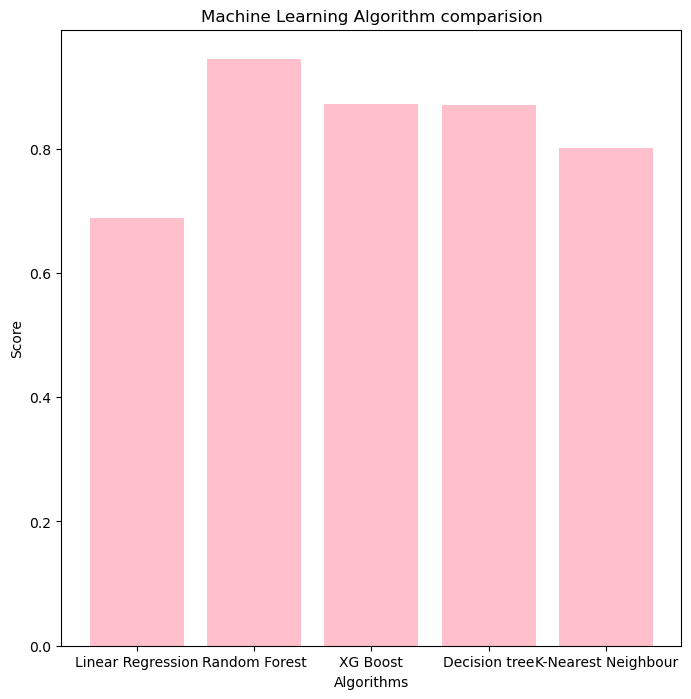

In [63]:
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed

# Create the bar chart
plt.bar(algorithms, scores, color='pink')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Machine Learning Algorithm comparision')
plt.show()

From above, we can see that Random Forest performed the best, closely followed by XG Boost and Decision Tree. So we will be choosing Random Forest for the final model

# Model Prediction

In [78]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
    prediction_array = []
# Batting Team
    if batting_team == 'Chennai Super Kings':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
    if bowling_team == 'Chennai Super Kings':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders': 
        prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad': 
        prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
    prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
    prediction_array = np.array([prediction_array])
    pred = model.predict(prediction_array)
    return int(round(pred[0]))

In [82]:
#Test 1
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 148 || Actual Score : 147


Test 1

Batting Team : Delhi Daredevils

Bowling Team : Chennai Super Kings

Final Score : 147

In [83]:
#Test 2
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = score_predict(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 187 || Actual Score : 176


Test 2

Batting Team : Mumbai Indians

Bowling Team : Kings XI Punjab

Final Score : 176

In [90]:
#Test 3
batting_team='Royal Challengers Bangalore'
bowling_team='Sunrisers Hyderabad'
score = score_predict(batting_team, bowling_team, overs=12, runs=84, wickets=3, runs_last_5=46, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 161')

Predicted Score : 165 || Actual Score : 161


Test 3

Batting Team : Royal Challengers Bangalore

Bowling Team : Sunrisers Hyderabad

Final Score : 161